## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID" )

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_study_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])

# Using .df.loc[] to retrieve mouse ID's for duplicate mice.
mouse_duplicate_ids = mouse_study_df.loc[mouse_duplicates, 'Mouse ID'].unique()
mouse_duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_duplicates_df = mouse_study_df.loc[mouse_study_df["Mouse ID"]=="g989", :]
mouse_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drop_index = mouse_duplicates_df.index
mouse_study_unique = mouse_study_df.drop(mouse_drop_index)
mouse_study_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_unique["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_group = mouse_study_df.groupby(["Drug Regimen"])
tumorVol_mean = mouse_study_group["Tumor Volume (mm3)"].mean()
tumorVol_median = mouse_study_group["Tumor Volume (mm3)"].median()
tumorVol_variance = mouse_study_group["Tumor Volume (mm3)"].var()
tumorVol_std = mouse_study_group["Tumor Volume (mm3)"].std()
tumorVol_SE = mouse_study_group["Tumor Volume (mm3)"].sem()

Regimen_Tumor_stats = pd.DataFrame({
                            "Tumor mean": tumorVol_mean,
                            "Tumor median": tumorVol_median,
                            "Tumor variance": tumorVol_variance,
                            "Tumor STD": tumorVol_std,
                            "Tumor SE(M)": tumorVol_SE
                        })
Regimen_Tumor_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor mean,Tumor median,Tumor variance,Tumor STD,Tumor SE(M)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Regimen_Tumor_stats_agg = mouse_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
Regimen_Tumor_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Measurements of each Regimen')

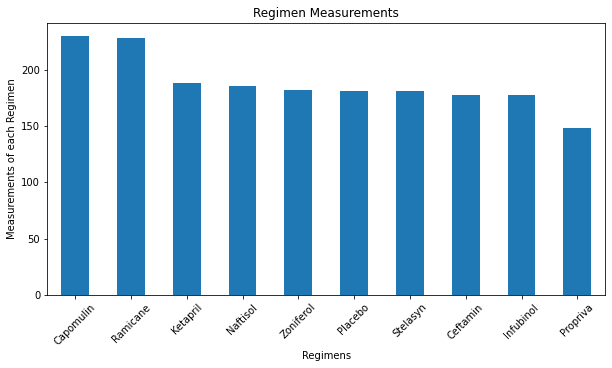

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = mouse_study_unique["Drug Regimen"].value_counts()
regimen_count.plot(kind = "bar", title = "Regimen Measurements", rot=45, figsize=(10,5))
plt.xlabel("Regimens")
plt.ylabel("Measurements of each Regimen")


Text(0.5, 1.0, 'Regimen Measurements')

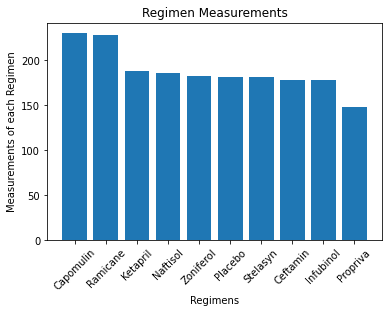

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen_count.index.values, regimen_count.values, align = "center")
plt.xticks(rotation=45)
plt.xlabel("Regimens")
plt.ylabel("Measurements of each Regimen")
plt.title("Regimen Measurements")



<AxesSubplot:ylabel='Sex'>

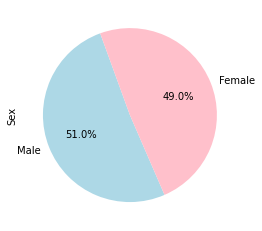

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = mouse_study_unique["Sex"].value_counts()
colors = ['lightblue', 'pink']
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=110, colors=colors)


(-1.201530633158663,
 1.1312174330404325,
 -1.1415157448888633,
 1.1319276838098218)

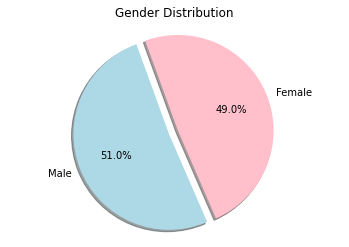

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution.values, labels=gender_distribution.index.values, explode=(0.1,0), autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=110)
plt.title("Gender Distribution")
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_timepoint_group = mouse_study_unique.groupby("Drug Regimen")



# final_regimen = regimen_timepoint_group.max()
final_regimens_df = pd.DataFrame(regimen_timepoint_group["Timepoint"].max())

# Start by getting the last (greatest) timepoint for each mouse
selected_final_regimens_df = final_regimens_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], :]
selected_final_regimens_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
selected_final_regimen_tumorVol = pd.merge(selected_final_regimens_df, mouse_study_unique, on=("Drug Regimen", "Timepoint"), how="left")
selected_final_regimen_tumorVol

,Drug Regimen,Timepoint,Mouse ID,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,45,s185,Female,3,17,23.343598,1
1,Capomulin,45,x401,Female,16,15,28.484033,0
2,Capomulin,45,m601,Male,22,17,28.430964,1
3,Capomulin,45,u364,Male,18,17,31.023923,3
4,Capomulin,45,y793,Male,17,17,31.896238,2
...,...,...,...,...,...,...,...,...
58,Ceftamin,45,w151,Male,24,25,67.527482,3
59,Ceftamin,45,x581,Female,19,28,64.634949,3
60,Ceftamin,45,x822,Male,3,29,61.386660,3
61,Ceftamin,45,y769,Female,6,27,68.594745,4


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
regimens_tumorVol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens:
    regimen_vol = selected_final_regimen_tumorVol.loc[selected_final_regimen_tumorVol["Drug Regimen"]==regimen, "Tumor Volume (mm3)"]
    
     # add subset
    regimens_tumorVol.append(regimen_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Q1 = regimen_vol.quantile(0.25)
    Q3 = regimen_vol.quantile(0.75)
    IQR = Q3 - Q1
    
    
    lowerBound = Q1-(1.5*IQR)
    upperBound = Q3+(1.5*IQR)
    print(f" Lower bound of {regimen} is {lowerBound}")
    print(f" Upper bound of {regimen} is {upperBound}")       
    
    # Determine outliers using upper and lower bounds
    outliers = regimen_vol.loc[(regimen_vol < lowerBound) | (regimen_vol > upperBound)]
    print(f"{regimen} potential outliers: {outliers}")
       

 Lower bound of Capomulin is 20.70456164999999
 Upper bound of Capomulin is 51.83201549
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Lower bound of Ramicane is 19.690480101250003
 Upper bound of Ramicane is 49.79900043124999
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Lower bound of Infubinol is 55.35777559500001
 Upper bound of Infubinol is 75.08224443499999
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Lower bound of Ceftamin is 52.29350701999999
 Upper bound of Ceftamin is 76.66786758
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


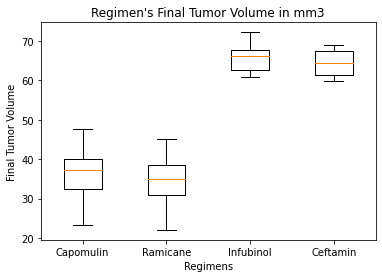

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier = dict(markerfacecolor='r', marker='s')
plt.boxplot(regimens_tumorVol, labels=regimens, flierprops=outlier )
plt.title("Regimen's Final Tumor Volume in mm3")
plt.xlabel("Regimens")
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume over-time')

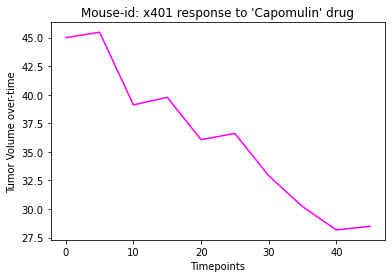

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorVol_time = mouse_study_unique.loc[mouse_study_unique["Drug Regimen"]=="Capomulin",
                                       ["Mouse ID","Tumor Volume (mm3)","Timepoint"]]

mouse = np.random.choice(tumorVol_time["Mouse ID"])

mouse_tumorVol_time = tumorVol_time.loc[tumorVol_time["Mouse ID"]==mouse, :]
plt.plot(mouse_tumorVol_time["Timepoint"], mouse_tumorVol_time["Tumor Volume (mm3)"], color="magenta" )
plt.title(f"Mouse-id: {mouse} response to 'Capomulin' drug")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume over-time")

          Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636          22
b742               40.083699          21
f966               36.505973          17
g288               41.990097          19
g316               44.613344          22


<AxesSubplot:title={'center':'Capomulin - Correlation between Mouse Weights & Tumor Volume'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

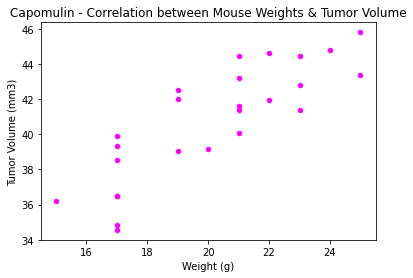

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_vol_weight=mouse_study_unique.loc[mouse_study_unique["Drug Regimen"]=="Capomulin",
                                            ["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]

# Calculating averages using groupby on above data frame of Capomulin regimen
capomulin_df = Capomulin_vol_weight.groupby(['Mouse ID']).mean()
print(capomulin_average.head())

# Generating Scatter plot using groupby Capomulin dataframe
capomulin_df.plot.scatter("Weight (g)", "Tumor Volume (mm3)", c="magenta",
                               title="Capomulin - Correlation between Mouse Weights & Tumor Volume")


## Correlation and Regression

Correlation coefficient(r-value) of mouse-weight and Tumor Volume is: 0.84


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712645e-07, stderr=0.1275435903320134)



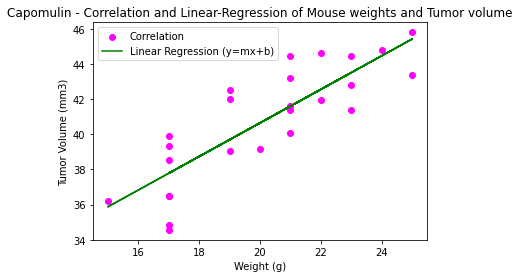

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x=capomulin_df["Weight (g)"]
y=capomulin_df["Tumor Volume (mm3)"]

r_val = x.corr(y,method="pearson")
print(f"Correlation coefficient(r-value) of mouse-weight and Tumor Volume is: {round(r_val,2)}")
linear_regression_parameters = st.linregress(x, y)
print("")
print("")
print(f"{linear_regression_parameters}")
print("")

# Plot the data along with the fitted line:

correlation = plt.scatter(x, y, c="magenta")
line_Regression, = plt.plot(x, linear_regression_parameters[1] + linear_regression_parameters[0]*x, color="green")

# Providing legend, title, xlabel & ylabel for the plot
plt.legend([correlation, line_Regression], ['Correlation', 'Linear Regression (y=mx+b)'])
plt.title("Capomulin - Correlation and Linear-Regression of Mouse weights and Tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



In [ ]:
# Final Summary Report

## Summary Report:

•	Capumolin is highest administered drug/Regimen on the mice.

•	Capumolin & Ramicane both have high success rate reducing tumor volume with latter taking the lead. (Observation from Box plot)


•	Mouse-id: x401 positively responded to 'Capomulin' drug in a fascinating way that the tumor size has been drastically reduced after administering the drug for 40+ days.


•	Correlation coefficient between mouse-weight and Tumor Volume is: 0.84.
There is a positive correlation between mouse weights and tumor volume.
